# Basic Probability Calculations


In [74]:
#Usefull imports
import sys 
sys.path.append("../")
from pyACC.Calculus import simpsons_rule
import numpy as np
import matplotlib.pyplot as plt
#For 3D extra plot
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import norm


In [75]:
def pdf(A, w):
    '''
    Args:
    - A: Amplitude of the sine wave
    - w: Frequency of the sine wave 
    
    
    Returns:
    - numpy arrays representing y as defined below
    '''
    
    y = A*np.sin(w)**2
    
    return y

# Example usage:
#Prior box of parameters: just defining where to take parameters
A = np.linspace(0.1, 10, 1000)
w = np.linspace(0.1, 10, 1000)

parA, parW = np.meshgrid(A, w) #grids of point such as we have all combinations of A with w and viceversa

y_values = pdf(parA, parW)


In [76]:
###*********###
###TEST CELL###
###*********###
print(parW)
print(parA)

[[ 0.1         0.1         0.1        ...  0.1         0.1
   0.1       ]
 [ 0.10990991  0.10990991  0.10990991 ...  0.10990991  0.10990991
   0.10990991]
 [ 0.11981982  0.11981982  0.11981982 ...  0.11981982  0.11981982
   0.11981982]
 ...
 [ 9.98018018  9.98018018  9.98018018 ...  9.98018018  9.98018018
   9.98018018]
 [ 9.99009009  9.99009009  9.99009009 ...  9.99009009  9.99009009
   9.99009009]
 [10.         10.         10.         ... 10.         10.
  10.        ]]
[[ 0.1         0.10990991  0.11981982 ...  9.98018018  9.99009009
  10.        ]
 [ 0.1         0.10990991  0.11981982 ...  9.98018018  9.99009009
  10.        ]
 [ 0.1         0.10990991  0.11981982 ...  9.98018018  9.99009009
  10.        ]
 ...
 [ 0.1         0.10990991  0.11981982 ...  9.98018018  9.99009009
  10.        ]
 [ 0.1         0.10990991  0.11981982 ...  9.98018018  9.99009009
  10.        ]
 [ 0.1         0.10990991  0.11981982 ...  9.98018018  9.99009009
  10.        ]]


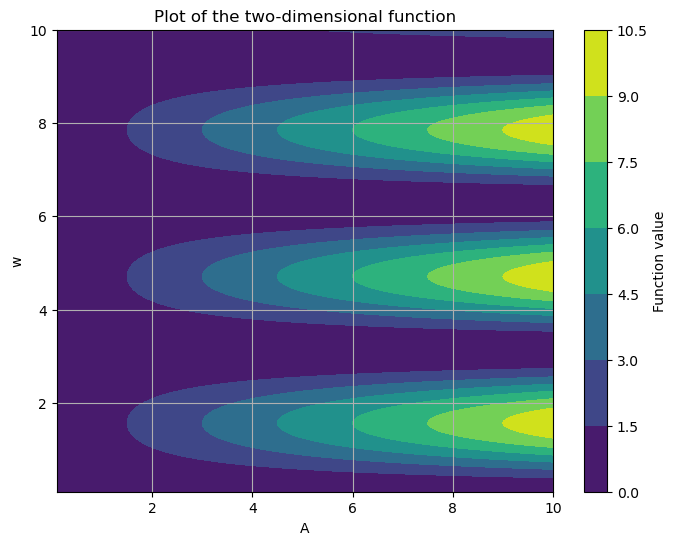

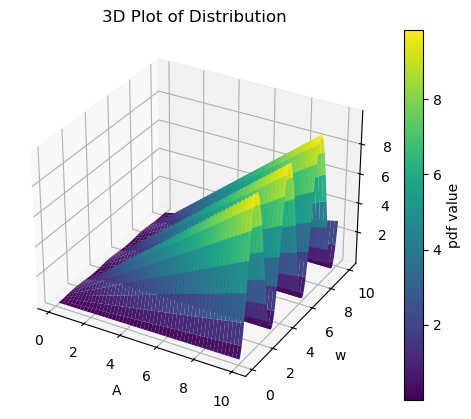

In [77]:
# Plotting 2D probability function
plt.figure(figsize=(8, 6))
plt.contourf(parA, parW, y_values, cmap='viridis')  # Plot the contour of the function
plt.colorbar(label='Function value')
plt.xlabel('A')
plt.ylabel('w')
plt.title('Plot of the two-dimensional function')
plt.grid(True)
plt.show()

#Plot 3D
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(parA, parW, y_values, cmap='viridis')

# Add labels and title
ax.set_xlabel('A')
ax.set_ylabel('w')
ax.set_zlabel('pdf value')
ax.set_title('3D Plot of Distribution')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, label='pdf value')

plt.show()


In [78]:
# sample your reference probability on a 2D regular grid in the prior box
# normalize the pdf
#Approch 1: sum_ij over function in point ij of grid times delta_i * delta_j
delta_A = parA[0, 2] - parA[0, 1] #those steps are actually correct: modifing the distances in the array of definition
delta_W = parW[2, 0] - parW[1, 0] #they alter the correct parameter; in conclusion: A is in COLUMN, w is in LINE

print('Step over A: ', delta_A)
print('Step over w: ', delta_W)

norma = np.sum(y_values)*delta_A*delta_W

print('Normalization value: ', norma)


Step over A:  0.00990990990990992
Step over w:  0.00990990990990992
Normalization value:  238.86263354766783


In [79]:
#Approch 2 to normalization:
#Integration over A with marginalization
'''
integ_over_A = simpsons_rule(lambda parA : pdf(parA, parW), parA[0,0], parA[0,-1], 1000) 
print(parA)
print(integ_over_A)
integ_over_W = simpsons_rule(lambda parW : integ_over_A, parW[0,0], parW[-1,0], 1000)

#norm_sof = integ_over_A * integ_over_W
'''
#print(norm_sof)

'\ninteg_over_A = simpsons_rule(lambda parA : pdf(parA, parW), parA[0,0], parA[0,-1], 1000) \nprint(parA)\nprint(integ_over_A)\ninteg_over_W = simpsons_rule(lambda parW : integ_over_A, parW[0,0], parW[-1,0], 1000)\n\n#norm_sof = integ_over_A * integ_over_W\n'

In [80]:
#Defining normalized pdf 
norm_pdf = y_values / norma

verifing_norm = np.sum(norm_pdf)*delta_A*delta_W #it should give 1

print(verifing_norm) #0.9999999999999992 good enough

0.9999999999999992


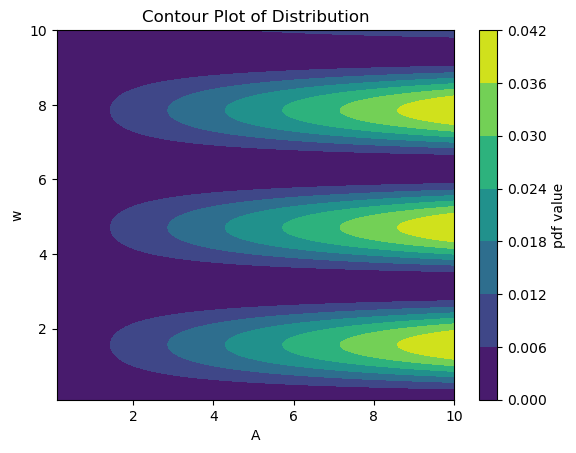

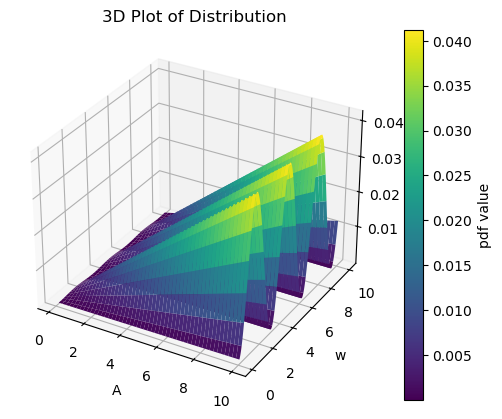

In [81]:
# contour plot the distribution (on generic iso-contours, the default ones work)
# Create a contour plot
plt.contourf(parA, parW, norm_pdf)
plt.xlabel('A')
plt.ylabel('w')
plt.title('Contour Plot of Distribution')
plt.colorbar(label='pdf value')
plt.show()

#Plot 3D
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(parA, parW, norm_pdf, cmap='viridis')

# Add labels and title
ax.set_xlabel('A')
ax.set_ylabel('w')
ax.set_zlabel('pdf value')
ax.set_title('3D Plot of Distribution')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, label='pdf value')

plt.show()


In [82]:
# marginalize the distribution and get two 1D distributions. Plot them.
# - how do I get rid off a parameter? I suppose performing a 1D integral.
rid_A = np.trapz(norm_pdf, dx = delta_A, axis=1) #axis=0 axis of parameters stored as line of 2D array; axis=1 stored as column

print(rid_A)
print(len(rid_A))
print(len(norm_pdf))
print(len(parW))

[2.08607647e-03 2.51827161e-03 2.99058622e-03 3.50283476e-03
 4.05481604e-03 4.64631321e-03 5.27709394e-03 5.94691044e-03
 6.65549960e-03 7.40258308e-03 8.18786741e-03 9.01104413e-03
 9.87178988e-03 1.07697666e-02 1.17046214e-02 1.26759872e-02
 1.36834824e-02 1.47267113e-02 1.58052640e-02 1.69187169e-02
 1.80666326e-02 1.92485601e-02 2.04640353e-02 2.17125806e-02
 2.29937056e-02 2.43069072e-02 2.56516693e-02 2.70274638e-02
 2.84337503e-02 2.98699763e-02 3.13355777e-02 3.28299788e-02
 3.43525926e-02 3.59028209e-02 3.74800548e-02 3.90836748e-02
 4.07130509e-02 4.23675430e-02 4.40465014e-02 4.57492665e-02
 4.74751693e-02 4.92235320e-02 5.09936678e-02 5.27848813e-02
 5.45964689e-02 5.64277190e-02 5.82779123e-02 6.01463220e-02
 6.20322142e-02 6.39348480e-02 6.58534761e-02 6.77873448e-02
 6.97356945e-02 7.16977599e-02 7.36727701e-02 7.56599495e-02
 7.76585173e-02 7.96676886e-02 8.16866742e-02 8.37146809e-02
 8.57509121e-02 8.77945679e-02 8.98448457e-02 9.19009399e-02
 9.39620430e-02 9.602734

In [83]:
'''
#Plotting marginalized function (marginalizing over A)
plt.plot(parW, rid_A, label='rid_A')  # Plot the function
plt.xlabel('Parameter w')  # Label for x-axis
plt.ylabel('Marginalized PDF over A')  # Label for y-axis
plt.title('Plot of rid_A')  # Title for the plot
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot
'''

"\n#Plotting marginalized function (marginalizing over A)\nplt.plot(parW, rid_A, label='rid_A')  # Plot the function\nplt.xlabel('Parameter w')  # Label for x-axis\nplt.ylabel('Marginalized PDF over A')  # Label for y-axis\nplt.title('Plot of rid_A')  # Title for the plot\nplt.legend()  # Show legend\nplt.grid(True)  # Show grid\nplt.show()  # Display the plot\n"

In [84]:
#Checking length for line of parW
print(len(parW[0, :]))

1000


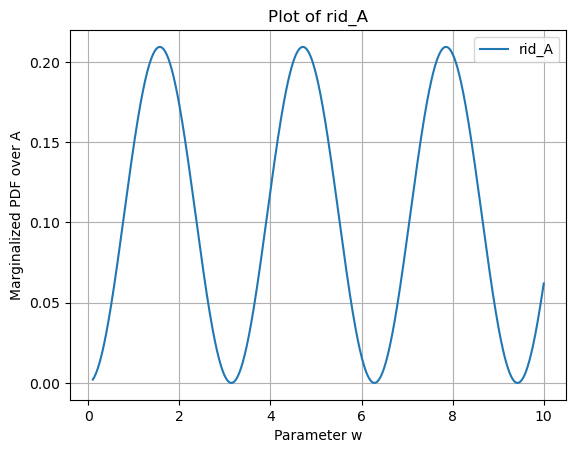

In [85]:
#Plotting marginalized function (marginalizing over A)
plt.plot(parW[:, 0], rid_A, label='rid_A')  # Plot the function
plt.xlabel('Parameter w')  # Label for x-axis
plt.ylabel('Marginalized PDF over A')  # Label for y-axis
plt.title('Plot of rid_A')  # Title for the plot
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot

In [86]:
# marginalize the distribution and get two 1D distributions. Plot them.
# - how do I get rid off a parameter? I suppose performing a 1D integral.
rid_w = np.trapz(norm_pdf, dx = delta_A, axis=0) #axis=0 axis of parameters stored as line of 2D array; axis=1 stored as column

print(rid_w)
print(len(rid_w))
print(len(norm_pdf))
print(len(parW))

[0.00199757 0.00219552 0.00239348 0.00259144 0.00278939 0.00298735
 0.00318531 0.00338326 0.00358122 0.00377918 0.00397713 0.00417509
 0.00437305 0.00457101 0.00476896 0.00496692 0.00516488 0.00536283
 0.00556079 0.00575875 0.0059567  0.00615466 0.00635262 0.00655057
 0.00674853 0.00694649 0.00714444 0.0073424  0.00754036 0.00773832
 0.00793627 0.00813423 0.00833219 0.00853014 0.0087281  0.00892606
 0.00912401 0.00932197 0.00951993 0.00971788 0.00991584 0.0101138
 0.01031176 0.01050971 0.01070767 0.01090563 0.01110358 0.01130154
 0.0114995  0.01169745 0.01189541 0.01209337 0.01229132 0.01248928
 0.01268724 0.0128852  0.01308315 0.01328111 0.01347907 0.01367702
 0.01387498 0.01407294 0.01427089 0.01446885 0.01466681 0.01486476
 0.01506272 0.01526068 0.01545864 0.01565659 0.01585455 0.01605251
 0.01625046 0.01644842 0.01664638 0.01684433 0.01704229 0.01724025
 0.0174382  0.01763616 0.01783412 0.01803208 0.01823003 0.01842799
 0.01862595 0.0188239  0.01902186 0.01921982 0.01941777 0.01961

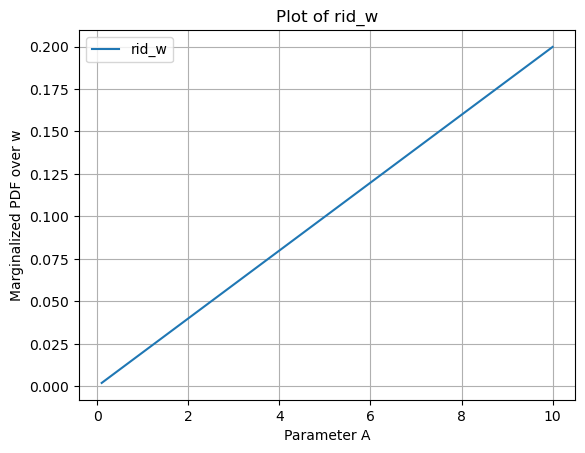

In [87]:
#Plotting marginalized function (marginalizing over A)
plt.plot(parA[0, :], rid_w, label='rid_w')  # Plot the function
plt.xlabel('Parameter A')  # Label for x-axis
plt.ylabel('Marginalized PDF over w')  # Label for y-axis
plt.title('Plot of rid_w')  # Title for the plot
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot

In [88]:
# check that marginalization does not alter the normalization of the pdf.
check_rid_A = np.sum(rid_A)*delta_W
check_rid_w = np.sum(rid_w)*delta_A

print(check_rid_A)
print(check_rid_w)

0.9989999999999997
0.9996824087612441


ModeResult(mode=2.067282992468364e-05, count=1)


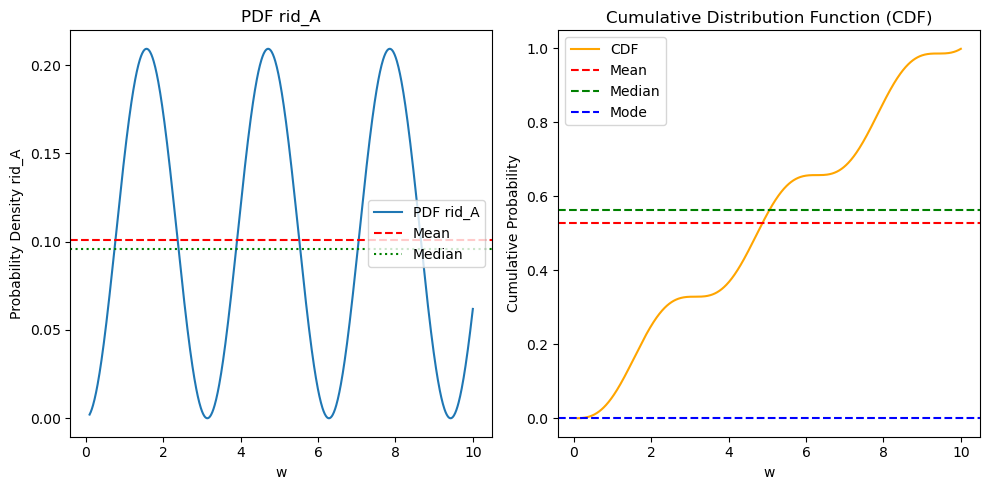

In [89]:
# calculate the cumulative distribution function of the 1D distribution. Plot it.
# Calculate CDF
cdf_values_rid_A = np.cumsum(rid_A) * delta_W  # Trapezoidal integration such as you sum the area of theC
# the cumulative distribution (still need to multiply for the height of the trapezoid, i. e. the value of separation in the array)

# Calculate mean for the distribution rid_w
meanA = np.mean(rid_A)

# Calculate median for the distribution rid_w
medianA = np.median(rid_A)

# Calculate mean for the distribution cdf_values_rid_w
mean_cdf_A = np.mean(cdf_values_rid_A)

# Calculate median for the distribution cdf_values_rid_w
median_cdf_A = np.median(cdf_values_rid_A)

# Calculate mode for the distribution cdf_values_rid_w
mode_cdf_A = stats.mode(cdf_values_rid_A)
print(mode_cdf_A)

# Plot PDF and CDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(parW[:, 0], rid_A, label='PDF rid_A')
plt.axhline(y=meanA, color='r', linestyle='--', label='Mean')
plt.axhline(y=medianA, color='g', linestyle=':', label='Median')
plt.xlabel('w')
plt.ylabel('Probability Density rid_A')
plt.title('PDF rid_A')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(parW[:, 0], cdf_values_rid_A, label='CDF', color='orange')
plt.axhline(y=mean_cdf_A, color='r', linestyle='--', label='Mean')
plt.axhline(y=median_cdf_A, color='g', linestyle='--', label='Median')
plt.axhline(y=mode_cdf_A[0], color='b', linestyle='--', label='Mode')
plt.xlabel('w')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

plt.tight_layout()
plt.show()

ModeResult(mode=1.9795691262598912e-05, count=1)


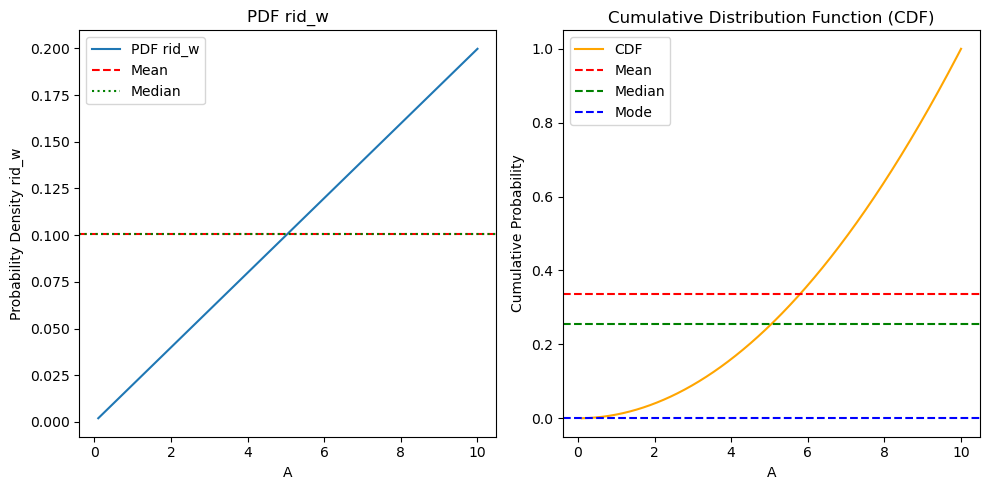

In [90]:
# calculate the cumulative distribution function of the 1D distribution. Plot it.
# Calculate CDF
cdf_values_rid_w = np.cumsum(rid_w) * delta_A  # Trapezoidal integration such as you sum the area of the
# the cumulative distribution (still need to multiply for the height of the trapezoid, i. e. the value of separation in the array)

# Calculate mean for the distribution rid_w
meanW = np.mean(rid_w)

# Calculate median for the distribution rid_w
medianW = np.median(rid_w)

# Calculate mean for the distribution cdf_values_rid_w
mean_cdf_w = np.mean(cdf_values_rid_w)

# Calculate median for the distribution cdf_values_rid_w
median_cdf_w = np.median(cdf_values_rid_w)

# Calculate mode for the distribution cdf_values_rid_w
mode_cdf_w = stats.mode(cdf_values_rid_w)
print(mode_cdf_w)

# Plot PDF and CDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(parA[0, :], rid_w, label='PDF rid_w')
plt.axhline(y=meanW, color='r', linestyle='--', label='Mean')
plt.axhline(y=medianW, color='g', linestyle=':', label='Median')
plt.xlabel('A')
plt.ylabel('Probability Density rid_w')
plt.title('PDF rid_w')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(parA[0, :], cdf_values_rid_w, label='CDF', color='orange')
plt.axhline(y=mean_cdf_w, color='r', linestyle='--', label='Mean')
plt.axhline(y=median_cdf_w, color='g', linestyle='--', label='Median')
plt.axhline(y=mode_cdf_w[0], color='b', linestyle='--', label='Mode')
plt.xlabel('A')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

plt.tight_layout()
plt.show()


In [91]:
# calculate the variance of the 1D distribution. 
variance_A = np.var(rid_A)
variance_W = np.var(rid_w)
print('Variance of rid_A: ', variance_A)
print('Variance of rid_w: ', variance_W)

Variance of rid_A:  0.0055110919969620226
Variance of rid_w:  0.0032655750057895075


0.10080818181818169
0.07423672943336083


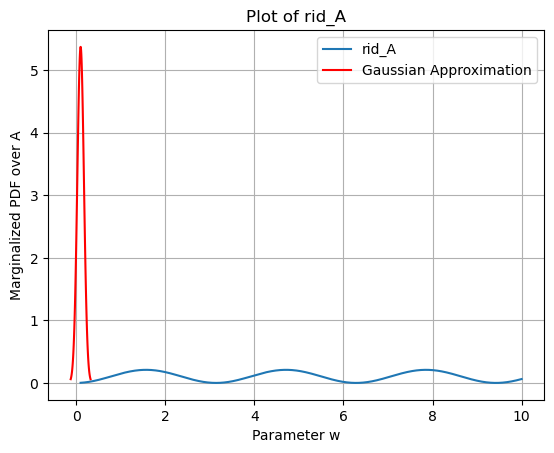

In [92]:
#Add to the plot the Gaussian approximation of your distribution.
#Plotting marginalized function (marginalizing over A)
mean_Gauss_A    = np.mean(rid_A)
std_dev_Gauss_A = np.std(rid_A)

print(mean_Gauss_A)
print(std_dev_Gauss_A)

# Create a range of values for the Gaussian approximation
Gauss_x = np.linspace(mean_Gauss_A - 3*std_dev_Gauss_A, mean_Gauss_A + 3*std_dev_Gauss_A, 100)
Gauss_y = norm.pdf(Gauss_x, mean_Gauss_A, std_dev_Gauss_A)

plt.plot(parW[:, 0], rid_A, label='rid_A')  # Plot the function
plt.plot(Gauss_x, Gauss_y, color='red', label='Gaussian Approximation')
plt.xlabel('Parameter w')  # Label for x-axis
plt.ylabel('Marginalized PDF over A')  # Label for y-axis
plt.title('Plot of rid_A')  # Title for the plot
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot


0.10087704306590727
0.05714520982365458


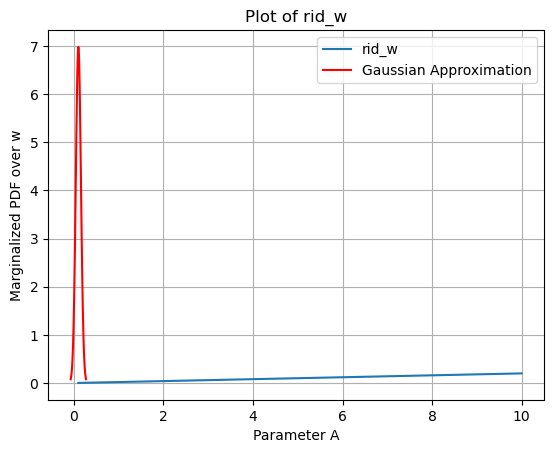

In [93]:
#Plotting marginalized function (marginalizing over w)
mean_Gauss_w    = np.mean(rid_w)
std_dev_Gauss_w = np.std(rid_w)

print(mean_Gauss_w)
print(std_dev_Gauss_w)

# Create a range of values for the Gaussian approximation
Gauss_x_2 = np.linspace(mean_Gauss_w - 3*std_dev_Gauss_w, mean_Gauss_w + 3*std_dev_Gauss_w, 100)
Gauss_y_2 = norm.pdf(Gauss_x_2, mean_Gauss_w, std_dev_Gauss_w)

#Plotting marginalized function (marginalizing over A)
plt.plot(parA[0, :], rid_w, label='rid_w')  # Plot the function
plt.plot(Gauss_x_2, Gauss_y_2, color='red', label='Gaussian Approximation')
plt.xlabel('Parameter A')  # Label for x-axis
plt.ylabel('Marginalized PDF over w')  # Label for y-axis
plt.title('Plot of rid_w')  # Title for the plot
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot

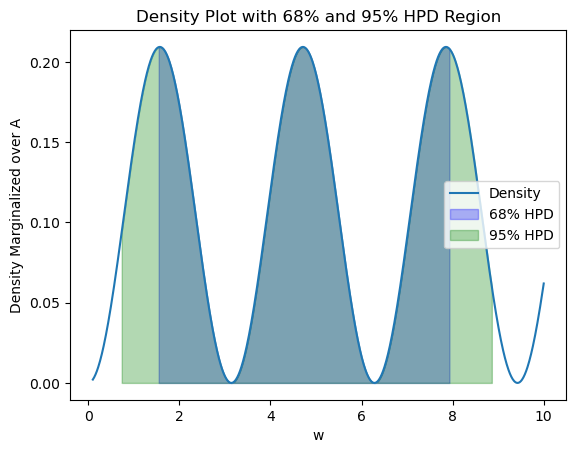

In [94]:
# calculate and plot the 68% HPD region for the 1D distribution. Plot it.

#FOR rid_A
lower_bound = np.interp(0.16, cdf_values_rid_A, w)
upper_bound = np.interp(0.84, cdf_values_rid_A, w)
# Find the lower and upper bounds for the 95% HPD region
lower_bound_95 = np.interp(0.025, cdf_values_rid_A, w)
upper_bound_95 = np.interp(0.975, cdf_values_rid_A, w)


# Plot the distribution
plt.plot(w, rid_A, label='Density')

# Shade the 68% HPD region
plt.fill_between(w, rid_A, where=(w >= lower_bound) & (w <= upper_bound), color='blue', alpha=0.3, label='68% HPD')

# Shade the 95% HPD region
plt.fill_between(w, rid_A, where=(w >= lower_bound_95) & (w <= upper_bound_95), color='green', alpha=0.3, label='95% HPD')

# Add labels and legend
plt.xlabel('w')
plt.ylabel('Density Marginalized over A')
plt.title('Density Plot with 68% and 95% HPD Region')
plt.legend()

# Show plot
plt.show()


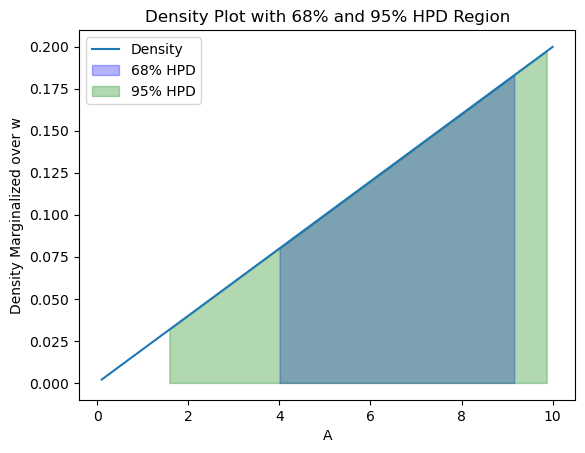

In [95]:
# calculate and plot the 68% HPD region for the 1D distribution. Plot it.

#FOR rid_w
lower_bound = np.interp(0.16, cdf_values_rid_w, A)
upper_bound = np.interp(0.84, cdf_values_rid_w, A)
# Find the lower and upper bounds for the 95% HPD region
lower_bound_95 = np.interp(0.025, cdf_values_rid_w, A)
upper_bound_95 = np.interp(0.975, cdf_values_rid_w, A)

# Plot the distribution
plt.plot(A, rid_w, label='Density')

# Shade the 68% HPD region
plt.fill_between(A, rid_w, where=(A >= lower_bound) & (A <= upper_bound), color='blue', alpha=0.3, label='68% HPD')

# Shade the 95% HPD region
plt.fill_between(A, rid_w, where=(A >= lower_bound_95) & (A <= upper_bound_95), color='green', alpha=0.3, label='95% HPD')


# Add labels and legend
plt.xlabel('A')
plt.ylabel('Density Marginalized over w')
plt.title('Density Plot with 68% and 95% HPD Region')
plt.legend()

# Show plot
plt.show()


In [96]:
# make a 2D contour plot of the 2D 68% HPD region. How does it relate to the 1D region? 

# Calculate the contour levels enclosing 68% of the density
level_68 = np.percentile(norm_pdf.ravel(), 100 - 68)
#.ravel() is like .flatten(); 100 - 68 since I want 68% and I exclude 100 - 68 = 32%

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


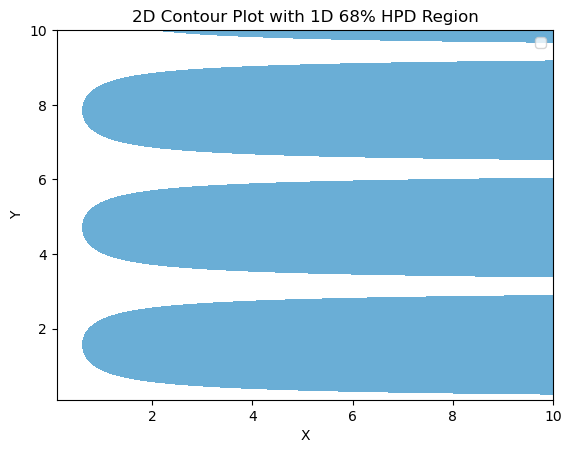

In [97]:
# Plot the 2D contour plot
plt.contourf(parA, parW, norm_pdf, levels=[level_68, np.max(norm_pdf)], cmap='Blues')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Contour Plot with 1D 68% HPD Region')
plt.legend()

# Show plot
plt.show()

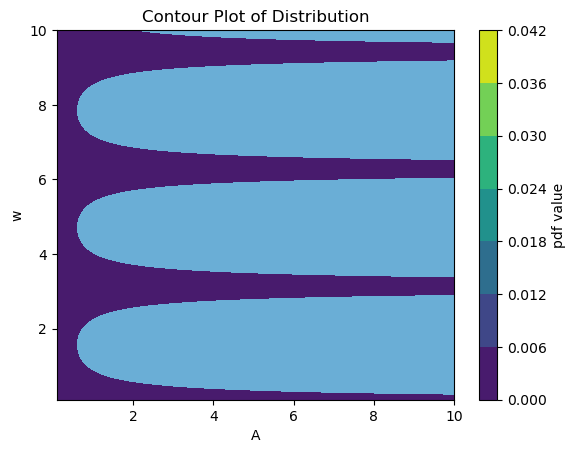

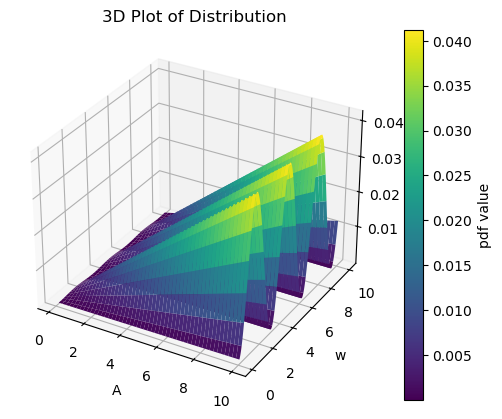

In [99]:
# contour plot the distribution (on generic iso-contours, the default ones work)
# Create a contour plot
plt.contourf(parA, parW, norm_pdf)
plt.xlabel('A')
plt.ylabel('w')
plt.title('Contour Plot of Distribution')
plt.colorbar(label='pdf value')
# Plot the 2D contour plot
plt.contourf(parA, parW, norm_pdf, levels=[level_68, np.max(norm_pdf)], cmap='Blues')
plt.show()

#Plot 3D
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(parA, parW, norm_pdf, cmap='viridis')



# Add labels and title
ax.set_xlabel('A')
ax.set_ylabel('w')
ax.set_zlabel('pdf value')
ax.set_title('3D Plot of Distribution')

# Add a color bar which maps values to colors
fig.colorbar(surf, ax=ax, label='pdf value')

plt.show()
